## Analysing MNIST Dataset to Identify Handwritten Digits
Often known as Hello World in the world of Machine Learning.

In [1]:
# load the MNIST dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)

# the data is returned as tuple (X, y) where X is the input data and y is the target data

X, y = mnist.data, mnist.target

In [ ]:
X.shape 

(70000, 784)

We have 70000 images with 784 features which are nothing but the pixels containing the pixel intensity from 0 (white) to 255 (black).

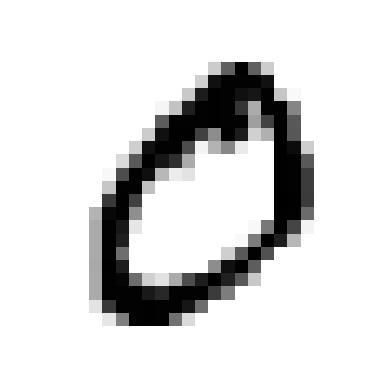

Actual image label 0


In [16]:
# Lets plot one of the images from the dataset to get a feel of the data
import matplotlib.pyplot as plt

def plot_digit_image(image_data):
    # we convert the 784 features into a 28x28 matrix
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[1]
plot_digit_image(some_digit)
plt.show()
print("Actual image label", y[1])

In [17]:
## Setting aside training and test dataset
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

To beign with we convert this problem into a simple binary classification problem where we only try to predict if a digit is 5 or not, so its a case of binary classification.

We use Stochastic Gradient Descent (SGD) and train this model on our training dataset.

In [19]:
# before we proceed with this binary classification, 
# we need to create a target vector with binary result for 5

y_train_5 = y_train == '5'
y_test_5 = y_test == '5'

# basically it is a numpy array so we can directly compare and get the desired boolean target vector



In [20]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)

# we train the model with full training dataset and the newly created target vector for digit 5
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

NOTE - it took around 13 seconds to train the model locally.

In [21]:
# After training its time to predict
sgd_clf.predict([some_digit])

array([False])

This is good, in this case some_digit was 0 which is NOT 5 and so the model predicts it to be False.